In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress 
import requests
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [2]:
#Definitions
PEAK_AGE = 80

In [3]:
# Load the clean 2005 data CSV file into a Pandas DataFrame
clean_2005_DD_df = pd.read_csv("cleaned_data_csv_files/clean_output_2005_DD_df.csv", low_memory=False)

# Display sample data
print(clean_2005_DD_df.shape)
clean_2005_DD_df.head()

(1719615, 12)


,Death in United States 2005,detail_age,detail_age_type_text,sex_text,race_text,marital_status_text,day_of_week_of_death_text,month_of_death_text,place_of_death_and_decedents_status_text,manner_of_death_text,358_cause_recode_text,130_infant_cause_recode_text
0,0,45,Years,Female,White,Married,Monday,January,"Hospital, clinic or Medical Center",Natural,Malignant melanoma of skin (C43),NaN
1,1,61,Years,Male,White,Divorced,Saturday,January,"Hospital, clinic or Medical Center",Natural,Emphysema (J43),NaN
2,2,79,Years,Female,White,Divorced,Sunday,January,Nursing home/long term care,Natural,Other cerebrovascular diseases and their seque...,NaN
3,3,50,Years,Male,White,"Never married, single",Wednesday,January,"Hospital, clinic or Medical Center",Natural,Diabetes mellitus (E10-E14),NaN
4,4,68,Years,Female,White,Married,Monday,January,"Hospital, clinic or Medical Center",Natural,"Of trachea, bronchus and lung (C33-C34)",NaN


In [4]:
#Reset index to use patient data ID numbers from original CSV, not arbitrary index assignments
clean_2005_DD_df = clean_2005_DD_df.drop(columns=["Death in United States 2005"])
clean_2005_DD_df

,detail_age,detail_age_type_text,sex_text,race_text,marital_status_text,day_of_week_of_death_text,month_of_death_text,place_of_death_and_decedents_status_text,manner_of_death_text,358_cause_recode_text,130_infant_cause_recode_text
0,45,Years,Female,White,Married,Monday,January,"Hospital, clinic or Medical Center",Natural,Malignant melanoma of skin (C43),NaN
1,61,Years,Male,White,Divorced,Saturday,January,"Hospital, clinic or Medical Center",Natural,Emphysema (J43),NaN
2,79,Years,Female,White,Divorced,Sunday,January,Nursing home/long term care,Natural,Other cerebrovascular diseases and their seque...,NaN
3,50,Years,Male,White,"Never married, single",Wednesday,January,"Hospital, clinic or Medical Center",Natural,Diabetes mellitus (E10-E14),NaN
4,68,Years,Female,White,Married,Monday,January,"Hospital, clinic or Medical Center",Natural,"Of trachea, bronchus and lung (C33-C34)",NaN
...,...,...,...,...,...,...,...,...,...,...,...
1719610,47,Years,Male,White,Marital Status unknown,Saturday,December,Decedent’s home,Natural,"Atherosclerotic cardiovascular disease, so des...",NaN
1719611,78,Years,Female,White,"Never married, single",Monday,September,Decedent’s home,Natural,"Atherosclerotic cardiovascular disease, so des...",NaN
1719612,32,Years,Female,White,Marital Status unknown,Tuesday,December,Decedent’s home,Natural,Diabetes mellitus (E10-E14),NaN
1719613,70,Years,Male,Black,Marital Status unknown,Sunday,December,Decedent’s home,Natural,"Atherosclerotic cardiovascular disease, so des...",NaN


In [5]:
#Create a new dataframe that only includes the data for individuals with a cause of death related to heart disease
selected_entries_heart = ["All other forms of chronic ischemic heart disease (I20,I25.1-I25.9)",
                    "Acute myocardial infarction (I21-I22)",
                    "Atherosclerotic cardiovascular disease, so described (I25.0)",
                    "Congestive heart failure (I50.0)"]

heart_disease_df = clean_2005_DD_df[clean_2005_DD_df["358_cause_recode_text"].isin(selected_entries_heart)]
heart_disease_df

,detail_age,detail_age_type_text,sex_text,race_text,marital_status_text,day_of_week_of_death_text,month_of_death_text,place_of_death_and_decedents_status_text,manner_of_death_text,358_cause_recode_text,130_infant_cause_recode_text
18,64,Years,Male,White,Divorced,Sunday,January,Other,Natural,"Atherosclerotic cardiovascular disease, so des...",NaN
58,63,Years,Male,White,Widowed,Friday,January,Decedent’s home,Natural,"Atherosclerotic cardiovascular disease, so des...",NaN
59,68,Years,Male,American Indian (includes Aleuts and Eskimos),"Never married, single",Saturday,January,Decedent’s home,Natural,"Atherosclerotic cardiovascular disease, so des...",NaN
65,81,Years,Female,White,Widowed,Saturday,January,Other,Natural,"Atherosclerotic cardiovascular disease, so des...",NaN
76,75,Years,Male,White,Married,Monday,January,"Hospital, clinic or Medical Center",Natural,All other forms of chronic ischemic heart dise...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1719608,65,Years,Female,Black,Marital Status unknown,Monday,December,"Hospital, Clinic or Medical Center",Natural,"Atherosclerotic cardiovascular disease, so des...",NaN
1719610,47,Years,Male,White,Marital Status unknown,Saturday,December,Decedent’s home,Natural,"Atherosclerotic cardiovascular disease, so des...",NaN
1719611,78,Years,Female,White,"Never married, single",Monday,September,Decedent’s home,Natural,"Atherosclerotic cardiovascular disease, so des...",NaN
1719613,70,Years,Male,Black,Marital Status unknown,Sunday,December,Decedent’s home,Natural,"Atherosclerotic cardiovascular disease, so des...",NaN


In [6]:
# Determine the number of heart disease deaths by sex
gender_count = heart_disease_df['sex_text']
male_count = len(heart_disease_df[heart_disease_df['sex_text'] == 'Male'])
female_count = len(heart_disease_df[heart_disease_df['sex_text'] == 'Female'])

print(f"Number of males in the DataFrame: {male_count}")
print(f"Number of females in the DataFrame: {female_count}")

Number of males in the DataFrame: 180368
Number of females in the DataFrame: 165817


In [7]:
# Describe the frequency of heart disease by age

# Mean
average_male_count = heart_disease_df.loc[heart_disease_df['sex_text'] == 'Male', 'detail_age'].mean()
average_female_count = heart_disease_df.loc[heart_disease_df['sex_text'] == 'Female', 'detail_age'].mean()

# Median
median_male_count = heart_disease_df.loc[heart_disease_df['sex_text'] == 'Male', 'detail_age'].median()
median_female_count = heart_disease_df.loc[heart_disease_df['sex_text'] == 'Female', 'detail_age'].median()

# Mode
mode_male_count = heart_disease_df.loc[heart_disease_df['sex_text'] == 'Male', 'detail_age'].mode()
mode_female_count = heart_disease_df.loc[heart_disease_df['sex_text'] == 'Female', 'detail_age'].mode()

print(f"Average count for males: {average_male_count}")
print(f"Median count for males: {median_male_count}")
print(f"Mode count for males: {mode_male_count}")
print (f"-----------------------------------------------")
print(f"Average count for females: {average_female_count}")
print(f"Median count for females: {median_female_count}")
print(f"Mode count for females: {mode_female_count}")

Average count for males: 73.60675951388274
Median count for males: 76.0
Mode count for males: 0    84
Name: detail_age, dtype: int64
-----------------------------------------------
Average count for females: 81.8883226689664
Median count for females: 84.0
Mode count for females: 0    87
Name: detail_age, dtype: int64


In [8]:
#Import csv file with age and sex data for 2005
census_2005_data_df = pd.read_csv("source_files/census_pop_data_2000_2010.csv", low_memory=False)
census_2005_data_df.head()

,REGION,DIVISION,STATE,NAME,SEX,AGE,ESTIMATESBASE2000,POPESTIMATE2000,POPESTIMATE2001,POPESTIMATE2002,POPESTIMATE2003,POPESTIMATE2004,POPESTIMATE2005,POPESTIMATE2006,POPESTIMATE2007,POPESTIMATE2008,POPESTIMATE2009,CENSUS2010POP,POPESTIMATE2010
0,0,0,0,United States,0,0,3805718,3855956,4012658,3951461,3975871,4014258,4004393,4041738,4147997,4132735,4003587,3944153,3952444
1,0,0,0,United States,0,1,3820647,3798691,3855407,4004674,3936139,3953063,3987032,3972124,4002215,4100756,4078797,3978070,3951024
2,0,0,0,United States,0,2,3790534,3800144,3800096,3856114,4002836,3933735,3952632,3988119,3973479,4004146,4103002,4096929,4087074
3,0,0,0,United States,0,3,3832855,3821118,3802710,3804336,3860727,4008220,3943215,3966022,4004011,3992320,4025675,4119040,4133855
4,0,0,0,United States,0,4,3926400,3902384,3827346,3812607,3816873,3876609,4030128,3970880,3998260,4041170,4033457,4063170,4076132


In [9]:
# Create dataframe showing age, sex, and population estimate for 2005
pop_data_2005_df = pd.DataFrame(census_2005_data_df, columns=["NAME", "AGE", "SEX", "POPESTIMATE2005"])
pop_data_2005_df.head()

,NAME,AGE,SEX,POPESTIMATE2005
0,United States,0,0,4004393
1,United States,1,0,3987032
2,United States,2,0,3952632
3,United States,3,0,3943215
4,United States,4,0,4030128


In [10]:
#Restrict the data to only the entries representing all US, to avoid duplication when county entries lsited by state
pop_data_2005_df = pop_data_2005_df[pop_data_2005_df["NAME"] == "United States"]
pop_data_2005_df.head()

,NAME,AGE,SEX,POPESTIMATE2005
0,United States,0,0,4004393
1,United States,1,0,3987032
2,United States,2,0,3952632
3,United States,3,0,3943215
4,United States,4,0,4030128


In [11]:
#Clean population dataset to remove individuals that do not identify as male or female
pop_data_2005_df = pop_data_2005_df[pop_data_2005_df["SEX"] != 0]
pop_data_2005_df.head()

,NAME,AGE,SEX,POPESTIMATE2005
87,United States,0,1,2047711
88,United States,1,1,2036538
89,United States,2,1,2020295
90,United States,3,1,2012820
91,United States,4,1,2058231


In [12]:
#Clean population data to remove entries where the age in unknown (defined as 999)
pop_data_2005_df = pop_data_2005_df[pop_data_2005_df["AGE"] != 999]
pop_data_2005_df.head()

,NAME,AGE,SEX,POPESTIMATE2005
87,United States,0,1,2047711
88,United States,1,1,2036538
89,United States,2,1,2020295
90,United States,3,1,2012820
91,United States,4,1,2058231


In [13]:
# Create a mapping dictionary for sex
sex_mapping = {1: 'Male', 2: 'Female'}

# Map the values in the 'SEX' column using the mapping dictionary
pop_data_2005_df['SEX'] = pop_data_2005_df['SEX'].map(sex_mapping)

# Display the updated DataFrame
print(pop_data_2005_df)

              NAME  AGE     SEX  POPESTIMATE2005
87   United States    0    Male          2047711
88   United States    1    Male          2036538
89   United States    2    Male          2020295
90   United States    3    Male          2012820
91   United States    4    Male          2058231
..             ...  ...     ...              ...
255  United States   81  Female           742630
256  United States   82  Female           683339
257  United States   83  Female           648391
258  United States   84  Female           595097
259  United States   85  Female          3249455

[172 rows x 4 columns]


In [14]:
# #Group the data for each sex into 10 year timeframes (ages 0-9, 10-19, etc between 0 and 120), and calculate the population total for those age groups

# Create a new column to represent the ten-year time frame
pop_data_2005_df['Ten_Year_Frame'] = (pop_data_2005_df['AGE'] // 10) * 10

# Group the data by sex and ten-year intervals, and calculate the sum of "POPESTIMATE2005"
result = pop_data_2005_df.groupby(['SEX', 'Ten_Year_Frame'])['POPESTIMATE2005'].sum()

# Display the result showing the sum for males and females in each ten-year interval
print(result)

SEX     Ten_Year_Frame
Female  0                 19215705
        10                20783171
        20                19935350
        30                20246774
        40                22810811
        50                19265300
        60                12330051
        70                 9028325
        80                 6704034
Male    0                 20090762
        10                21915622
        20                20559315
        30                20275816
        40                22313245
        50                18316653
        60                11086853
        70                 7038354
        80                 3600458
Name: POPESTIMATE2005, dtype: int64


C:\Users\STEFF\AppData\Local\Temp\ipykernel_75328\2983083532.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['age_group'] = pd.cut(filtered_df['detail_age'], bins=age_bins, labels=age_bins[:-1])


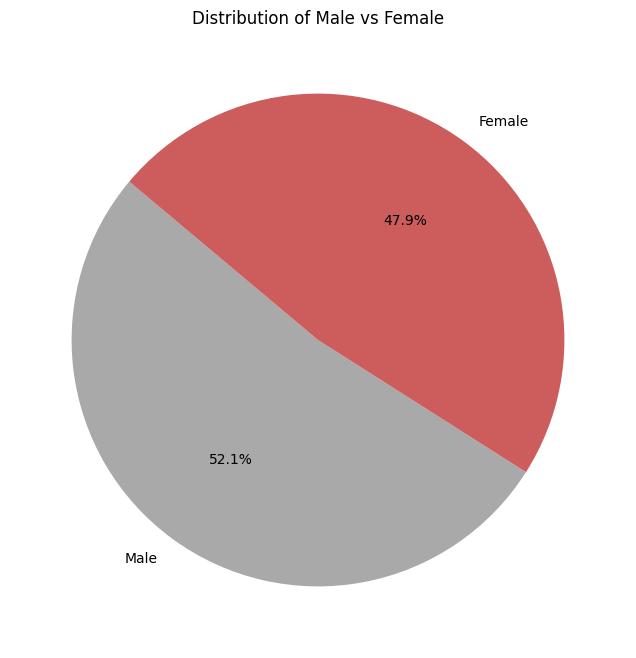

In [22]:
#Create a pie chart showing the percentage of male vs female patients whose caase of death was heart disease

# Filter out entries with age greater than 120 (Age Unknown populates as a number in the thousands)
filtered_df = heart_disease_df[heart_disease_df['detail_age'] <= 120]

# Define age groups for aggregation
# Create age bins of width 10
age_bins = np.arange(0, 121, 10)  

# Create a new column 'age_group' based on the age bins
filtered_df['age_group'] = pd.cut(filtered_df['detail_age'], bins=age_bins, labels=age_bins[:-1])

# Calculate the count of male and female
gender_counts = heart_disease_df['sex_text'].value_counts()

# Create a pie chart with males in grey and females in a shade of red
colors = ['darkgrey', 'indianred']  

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Male vs Female')
plt.show()

In [17]:
# Calculate the total number of women and men affected by heart disease
total_population_women = pop_data_2005_df.loc[pop_data_2005_df['SEX'] == 'Female', 'POPESTIMATE2005'].sum()
total_population_men = pop_data_2005_df.loc[pop_data_2005_df['SEX'] == 'Male', 'POPESTIMATE2005'].sum()

# Calculate the total number of women and men affected
total_women_affected = gender_counts['Female'] / 100 * total_population_women
total_men_affected = gender_counts['Male'] / 100 * total_population_men

# Display the total number of women and men affected
print(f"Total number of women affected by heart disease: {int(total_women_affected)}")
print(f"Total number of men affected by heart disease: {int(total_men_affected)}")

Total number of women affected by heart disease: 249255320136
Total number of men affected by heart disease: 261889065647


C:\Users\STEFF\AppData\Local\Temp\ipykernel_75328\2328657296.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_counts_by_age = filtered_df.groupby(['sex_text', 'age_group']).size().unstack()


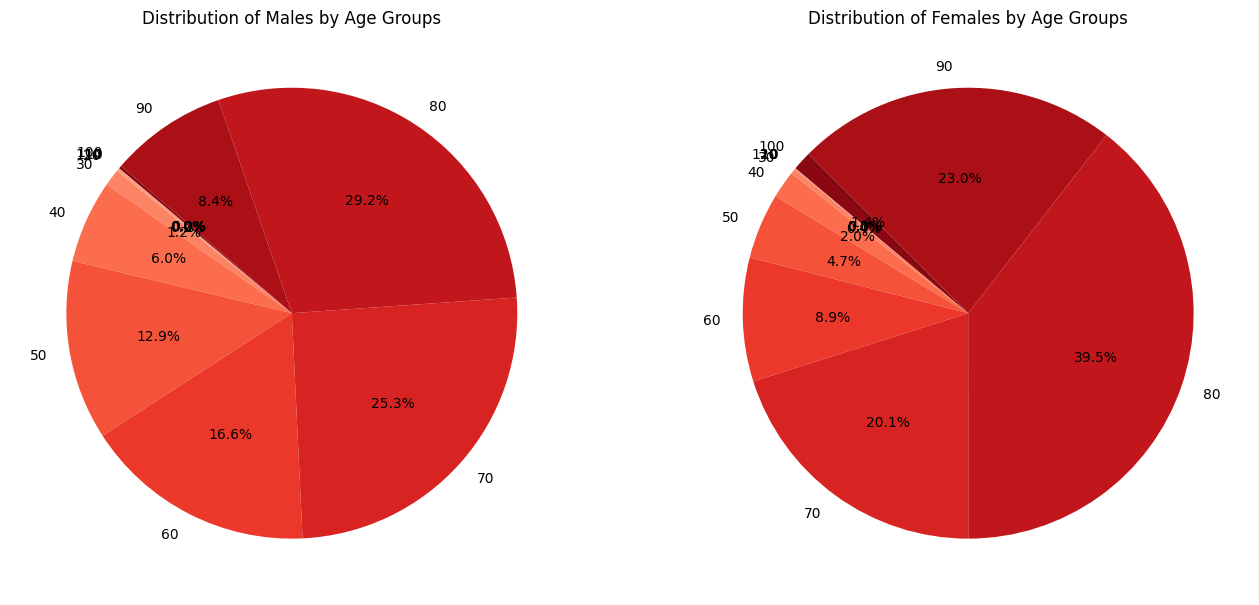

In [28]:
#Display the breakdown by age group for male or females deaths due to heart disease

# Calculate the count of male and female by age group
gender_counts_by_age = filtered_df.groupby(['sex_text', 'age_group']).size().unstack()

# Define colors for the pie charts based on a gradient of red, pink, white, and grey
colors = plt.cm.Reds(np.linspace(0.2, 1, len(gender_counts_by_age.columns)))

# Create two pie charts - one for males and one for females by age groups
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for males by age groups
wedges, texts, autotexts = axs[0].pie(gender_counts_by_age.loc['Male'], labels=gender_counts_by_age.columns, autopct='%1.1f%%', startangle=140, labeldistance=1.1, colors=colors)
axs[0].set_title('Distribution of Males by Age Groups')

# Pie chart for females by age groups
wedges, texts, autotexts = axs[1].pie(gender_counts_by_age.loc['Female'], labels=gender_counts_by_age.columns, autopct='%1.1f%%', startangle=140, labeldistance=1.1, colors=colors)
axs[1].set_title('Distribution of Females by Age Groups')

plt.show()

In [31]:
#Determine the total estimated deaths by age group for males and females

# Get the wedges from the pie chart
wedges, _, autotexts = axs[0].pie(gender_counts_by_age.loc['Male'], labels=gender_counts_by_age.columns, autopct='%1.1f%%', startangle=140, labeldistance=1.1)
wedges, _, autotexts = axs[0].pie(gender_counts_by_age.loc['Female'], labels=gender_counts_by_age.columns, autopct='%1.1f%%', startangle=140, labeldistance=1.1)

# Extract the displayed percentages from the autotexts
male_displayed_percentages = [float(autotext.get_text().strip('%')) for autotext in autotexts]
female_displayed_percentages = [float(autotext.get_text().strip('%')) for autotext in autotexts]

# Print the extracted percentages
print("Displayed Percentages from the Male Pie Chart:")
print(male_displayed_percentages)
print(f"----------------------------------------")
print("Displayed Percentages from the Feale Pie Chart:")
print(female_displayed_percentages)

Displayed Percentages from the Male Pie Chart:
[0.0, 0.0, 0.1, 0.4, 2.0, 4.7, 8.9, 20.1, 39.5, 23.0, 1.4, 0.0]
----------------------------------------
Displayed Percentages from the Feale Pie Chart:
[0.0, 0.0, 0.1, 0.4, 2.0, 4.7, 8.9, 20.1, 39.5, 23.0, 1.4, 0.0]


In [32]:
# Calculate the total number of deaths per age group for males and females
total_deaths_by_age_group_male = {}
total_deaths_by_age_group_female = {}

for idx, age_group in enumerate(gender_counts_by_age.columns):
    total_deaths_by_age_group_male[age_group] = male_displayed_percentages[idx] / 100 * total_men_affected
    total_deaths_by_age_group_female[age_group] = female_displayed_percentages[idx] / 100 * total_women_affected

# Display the total number of deaths per age group for males and females
print("Total number of deaths per age group for males:")
for age_group, total_deaths in total_deaths_by_age_group_male.items():
    print(f"Age Group: {age_group}, Total Deaths: {int(total_deaths)}")

print("\nTotal number of deaths per age group for females:")
for age_group, total_deaths in total_deaths_by_age_group_female.items():
    print(f"Age Group: {age_group}, Total Deaths: {int(total_deaths)}")

Total number of deaths per age group for males:
Age Group: 0, Total Deaths: 0
Age Group: 10, Total Deaths: 0
Age Group: 20, Total Deaths: 261889065
Age Group: 30, Total Deaths: 1047556262
Age Group: 40, Total Deaths: 5237781312
Age Group: 50, Total Deaths: 12308786085
Age Group: 60, Total Deaths: 23308126842
Age Group: 70, Total Deaths: 52639702195
Age Group: 80, Total Deaths: 103446180930
Age Group: 90, Total Deaths: 60234485098
Age Group: 100, Total Deaths: 3666446919
Age Group: 110, Total Deaths: 0

Total number of deaths per age group for females:
Age Group: 0, Total Deaths: 0
Age Group: 10, Total Deaths: 0
Age Group: 20, Total Deaths: 249255320
Age Group: 30, Total Deaths: 997021280
Age Group: 40, Total Deaths: 4985106402
Age Group: 50, Total Deaths: 11715000046
Age Group: 60, Total Deaths: 22183723492
Age Group: 70, Total Deaths: 50100319347
Age Group: 80, Total Deaths: 98455851453
Age Group: 90, Total Deaths: 57328723631
Age Group: 100, Total Deaths: 3489574481
Age Group: 110, T

In [ ]:
#Determine if the difference between males and females is statistically significant
#use t-test

In [ ]:
#Use this cell to describe findings

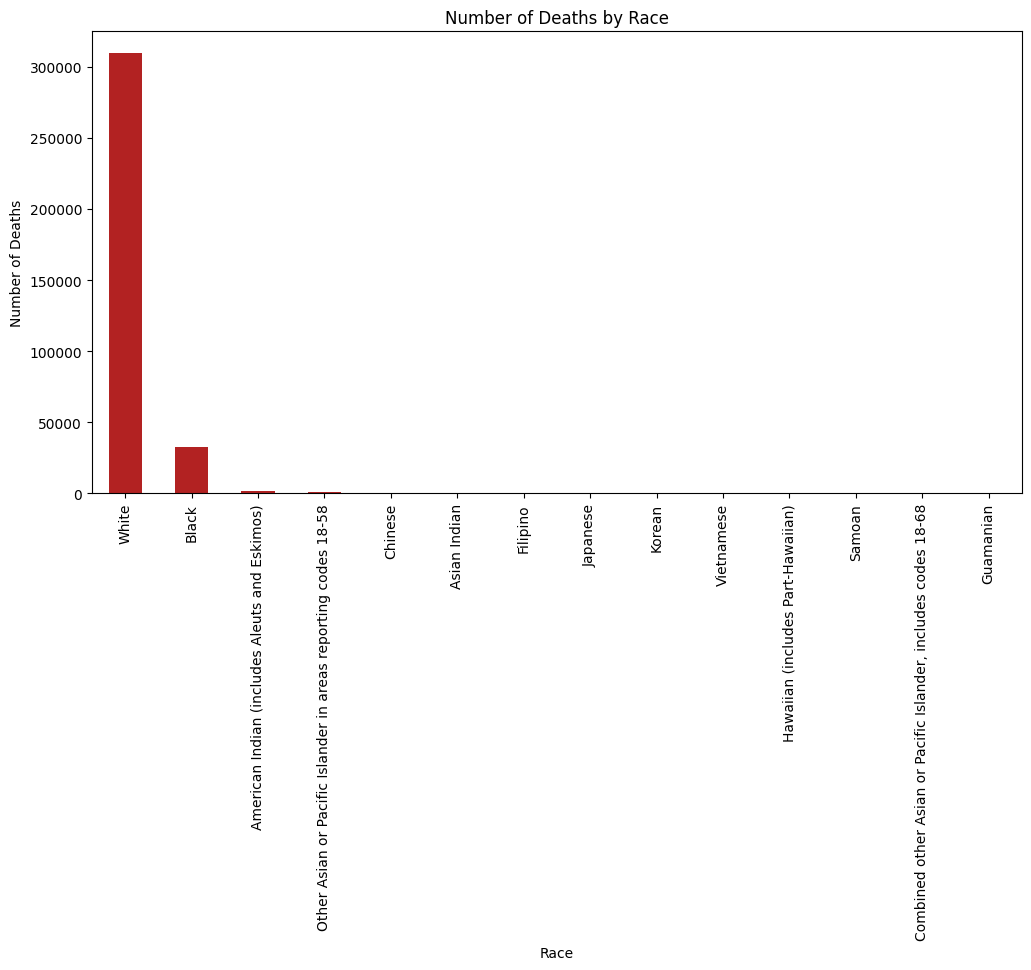

In [34]:
# Create a histogram of deaths due to heart disease by race

plt.figure(figsize=(12, 6))
heart_disease_df['race_text'].value_counts().plot(kind='bar', color='firebrick')
plt.title('Number of Deaths by Race')
plt.xlabel('Race')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Determine if the difference between males and females is statistically significant
#use ANOVA test

In [ ]:
#Use this cell to describe findings

C:\Users\STEFF\AppData\Local\Temp\ipykernel_75328\3496689869.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = filtered_df.groupby('age_group').size()


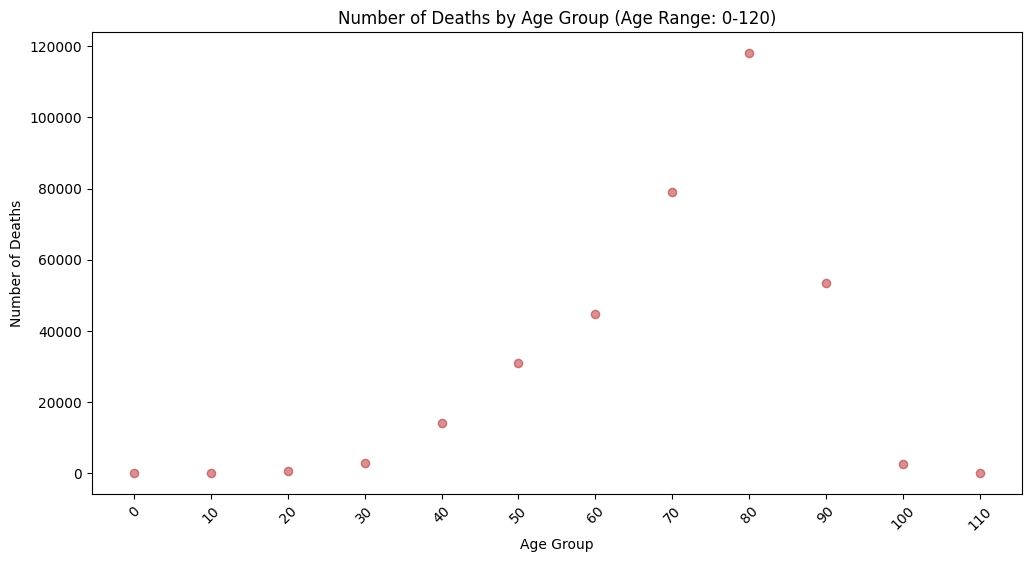

In [36]:
# Create a scatter plot of deaths by age

# Group by age group and count the number of deaths in each group
age_group_counts = filtered_df.groupby('age_group').size()

# Convert age_group_counts index to numeric
age_group_counts.index = pd.to_numeric(age_group_counts.index)

# Create a scatter plot of deaths by age group
plt.figure(figsize=(12, 6))
plt.scatter(age_group_counts.index, age_group_counts, color='firebrick', alpha=0.5)
plt.title('Number of Deaths by Age Group (Age Range: 0-120)')
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.xticks(age_group_counts.index, rotation=45)
plt.show()

R-squared value: 0.14967268159330932


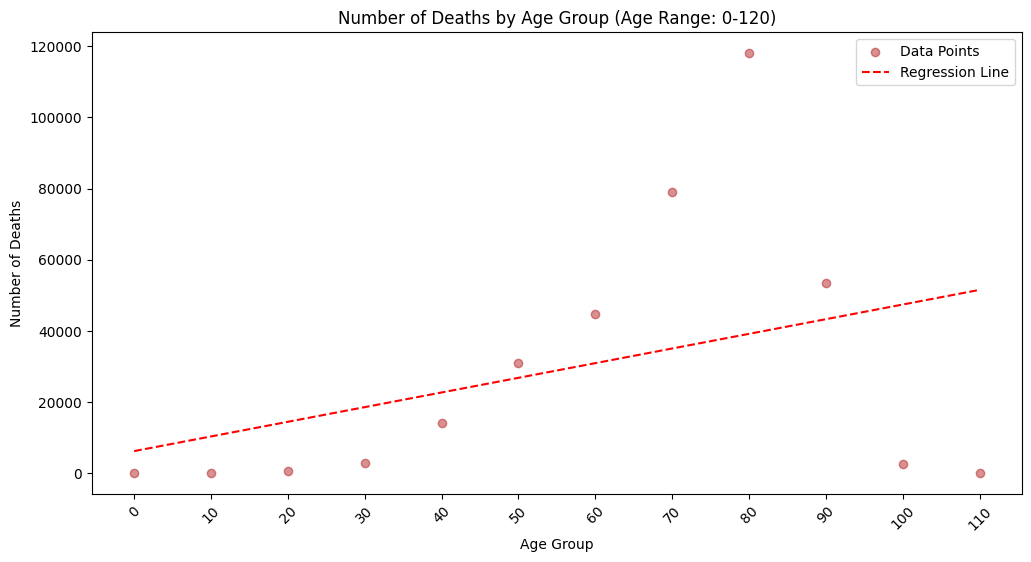

In [37]:
#Determine if there is a relationship between age and death due to heart disease using linear regression analysis

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(age_group_counts.index, age_group_counts)
regression_line = slope * age_group_counts.index + intercept

# Calculate R-squared value
r_squared = r_value ** 2
print(f"R-squared value: {r_squared}")

# Create a scatter plot of deaths by age group
plt.figure(figsize=(12, 6))
plt.scatter(age_group_counts.index, age_group_counts, color='firebrick', alpha=0.5, label='Data Points')
plt.plot(age_group_counts.index, regression_line, color='red', linestyle='--', label='Regression Line')
plt.title('Number of Deaths by Age Group (Age Range: 0-120)')
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.xticks(age_group_counts.index, rotation=45)
plt.legend()
plt.show()

In [38]:
# Men and Women deaths in individuals over 80
deaths_over80_male = heart_disease_df[(heart_disease_df['detail_age'] >= 81) & (heart_disease_df['sex_text'] == 'Male') ]
deaths_over80_female = heart_disease_df[(heart_disease_df['detail_age'] >= 81) & (heart_disease_df['sex_text'] == 'Female') ]

num_deaths_over80_male = len(deaths_over80_male)
num_deaths_over80_female = len(deaths_over80_female)

print(f"Number of deaths due to heart disease for males over age 80: {num_deaths_over80_male}")
print(f"Number of deaths due to heart disease for females over age 80: {num_deaths_over80_female}")

Number of deaths due to heart disease for males over age 80: 68160
Number of deaths due to heart disease for females over age 80: 105925


In [ ]:
#Calculate any statistical difference between men and women over age 80
#use t-test

In [ ]:
#Enter discussion of the shape of the curve and deciding to remove the age group > 80

In [39]:
# Define an exponential function for curve fitting betwen ages 0 and 80
def inc_exponential_death(age, a, b, c):
    y_increase = a * np.exp(b * (age-PEAK_AGE)) + c
    return y_increase 

In [40]:
#Define separate populations (increasing curve up to age 80, decreasing curve afterwards)
age_group_counts_leq_peak = age_group_counts[age_group_counts.index <= PEAK_AGE]
#age_group_counts_geq_peak = age_group_counts[age_group_counts.index >= PEAK_AGE]

The R-squared value is: -3873962.8707184484


C:\Users\STEFF\anaconda3\envs\dev_2\lib\site-packages\pandas\core\indexes\base.py:944: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)


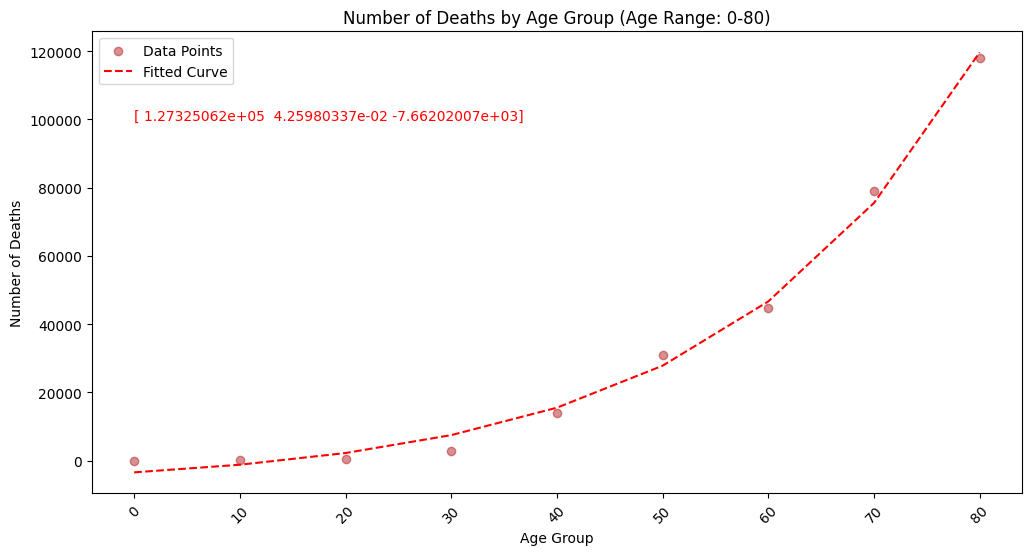

In [44]:
#Determine if there is a relationship between age and death due to heart disease using curvilinear regression analysis up to age 80

# Perform curvilinear regression (AKA curve fitting) 
popt, pcov = curve_fit(inc_exponential_death, age_group_counts_leq_peak.index, age_group_counts_leq_peak.values)

#Calculate the R-squared value
y_pred_leq = inc_exponential_death(age_group_counts_leq_peak.index, *popt)
r_squared = r2_score(age_group_counts_leq_peak.index, y_pred_leq)
print(f"The R-squared value is: {r_squared}")

# Create a scatter plot of deaths by age group
plt.figure(figsize=(12, 6))
plt.scatter(age_group_counts_leq_peak.index, age_group_counts_leq_peak, color='firebrick', alpha=0.5, label='Data Points')
plt.plot(age_group_counts_leq_peak.index, inc_exponential_death(age_group_counts_leq_peak.index, *popt), color='red', linestyle='--', label='Fitted Curve')
plt.title('Number of Deaths by Age Group (Age Range: 0-80)')
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.xticks(age_group_counts_leq_peak.index, rotation=45)
plt.legend()
plt.annotate(popt, (0, 100000), color='red')
plt.show()

In [42]:
#Describe the relationship

In [ ]:
#Evaluate the trend in males vs females up to age 80

# Filter the data for Males and age between 0 and 80
male_heart_data = heart_disease_df[(heart_disease_df['sex_text'] == 'Male') & (heart_disease_df['detail_age'] >= 0) & (heart_disease_df['detail_age'] <= 80)]
female_heart_data = heart_disease_df[(heart_disease_df['sex_text'] == 'Female') & (heart_disease_df['detail_age'] >= 0) & (heart_disease_df['detail_age'] <= 80)]


# Define the exponential function for curve fitting
def inc_exponential_death(x, a, b, c):
    return a * np.exp(b * x) + c

# # Total number of deaths per age group for males
# total_deaths_by_age_group_male = {
#     'Age Group 1': 100,  # Replace with actual values from your calculation
#     'Age Group 2': 150,
#     'Age Group 3': 200,
#     # Add more age groups and total deaths
# }

# # Prepare the data for the scatter plot
# age_groups = list(total_deaths_by_age_group_male.keys())
# total_deaths = [total_deaths_by_age_group_male[age_group] for age_group in age_groups]

# # Perform curvilinear regression on the filtered data
# popt, pcov = curve_fit(inc_exponential_death, filtered_data['Age'], total_deaths)

# # Calculate the R-squared value
# y_pred = inc_exponential_death(filtered_data['Age'], *popt)
# r_squared = r2_score(total_deaths, y_pred)
# print(f"The R-squared value is: {r_squared}")

# # Create a scatter plot of total deaths by age group for Males aged 0-80
# plt.figure(figsize=(12, 6))
# plt.scatter(filtered_data['Age'], total_deaths, color='firebrick', alpha=0.5, label='Data Points')
# plt.plot(filtered_data['Age'], inc_exponential_death(filtered_data['Age'], *popt), color='red', linestyle='--', label='Fitted Curve')
# plt.title('Total Number of Deaths by Age Group for Males (Age Range: 0-80)')
# plt.xlabel('Age')
# plt.ylabel('Total Number of Deaths')
# plt.legend()
# plt.show()

In [43]:
# # Define an exponential function for curve fitting between ages 80 and 120

# def dec_exponential_death(age, d, f, g):
#     y_decrease= d * np.exp(-(f * (age-PEAK_AGE))) + g
#     return y_decrease

In [ ]:
# #Determine if there is a relationship between age and death due to heart disease using curvilinear regression analysis after age 80

# # Perform curvilinear regression (AKA curve fitting) 
# popt, pcov = curve_fit(dec_exponential_death, age_group_counts_geq_peak.index, age_group_counts_geq_peak.values)

# #Calculate the R-squared value
# y_pred_geq = dec_exponential_death(age_group_counts_geq_peak.index, *popt)
# r_squared = r2_score(age_group_counts_geq_peak.values, y_pred_geq)
# print(f"The R-squared value is: {r_squared}")

# # Create a scatter plot of deaths by age group
# plt.figure(figsize=(12, 6))
# plt.scatter(age_group_counts_geq_peak.index, age_group_counts_geq_peak, color='skyblue', alpha=0.5, label='Data Points')
# plt.plot(age_group_counts_geq_peak.index, dec_exponential_death(age_group_counts_geq_peak.index, *popt), color='red', linestyle='--', label='Fitted Curve')
# plt.title('Number of Deaths by Age Group (Age Range: 80-120)')
# plt.xlabel('Age Group')
# plt.ylabel('Number of Deaths')
# plt.xticks(age_group_counts_geq_peak.index, rotation=45)
# plt.legend()
# plt.annotate(popt, (0, 100000), color='red')
# plt.show()


In [ ]:
#Use this cell to describe findings